In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

# Add parent directory to path
sys.path.append(os.path.dirname(os.getcwd()))

from functions.plot import set_size, plot_eigs

%load_ext autoreload
%autoreload 2

# Load DeReK's A matrix
A_derek = np.load("../results/A_DeReK_noise.npy")

# Print the loaded A_derek
eig_derek, _ = np.linalg.eig(A_derek)

eig_derek = eig_derek[np.argsort(eig_derek)[::-1]]

# Load eigenvalues and amplitudes of eDMD wo sqrt
eig_edmd_wo_sqrt = np.load("results/eig_eDMDc_wo_sqrt.npy")
amp_edmd_wo_sqrt = np.load("results/amplitudes_eDMDc_wo_sqrt.npy")

# Load eigenvalues and amplitudes of eDMD w sqrt
eig_edmd_w_sqrt = np.load("results/eig_eDMDc_w_sqrt.npy")
amp_edmd_w_sqrt = np.load("results/amplitudes_eDMDc_w_sqrt.npy")

In [3]:
import numpy as np
from scipy.linalg import expm

# Given parameters
F1 = 1
F2 = 1
k1 = 0.015
k2 = 0.015


def compute_A(h1, h2):
    # Compute the Jacobian matrix A
    A11 = -k1 / (2 * F1 * np.sqrt(h1))
    A12 = 0
    A21 = k1 / (2 * F2 * np.sqrt(h1))
    A22 = -k2 / (2 * F2 * np.sqrt(h2))

    # Construct the matrix A
    A = np.array([[A11, A12], [A21, A22]])

    return A


# Example heights (h1 and h2)
h1 = 1.0  # Example value for h1
h2 = 1.0  # Example value for h2

# Compute matrix A
Ts = 10
A = compute_A(h1, h2)
A_d = expm(A * Ts)

eig_original, _ = np.linalg.eig(A_d)

eig_original = eig_original[np.argsort(eig_original)[::-1]]

In [5]:
eig_edmd_w_sqrt.shape

(160,)

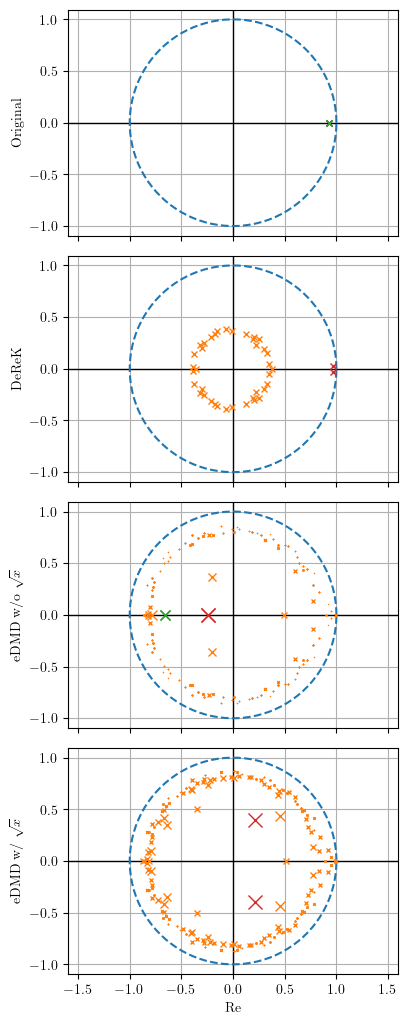

In [16]:
fig, axs = plt.subplots(
    4,
    1,
    figsize=set_size("ieee", subplots=(4, 1)),
    sharex=True,
)
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

plot_eigs(eig_original, ax=axs[0])
plot_eigs(eig_derek, ax=axs[1])
plot_eigs(eig_edmd_wo_sqrt, amp_edmd_wo_sqrt, ax=axs[2])
plot_eigs(eig_edmd_w_sqrt, amp_edmd_w_sqrt, ax=axs[3])
axs[0].set_ylabel("Original")
axs[1].set_ylabel("DeReK")
axs[2].set_ylabel("eDMD w/o $\\sqrt{x}$")
axs[3].set_ylabel("eDMD w/ $\\sqrt{x}$")
axs[-1].set_xlabel("Re")

fig.tight_layout()

for ax in axs:
    ax.set_xlim(-1.6, 1.6)
#     ax.set_ylim(-1.1, 1.1)
fig.savefig("results/eigenvalues_comparison.pdf")